# TensorFlores - Example 3

## 1. Importing libraries

In [1]:
import sys, os
path = os.getcwd().split('\\examples')[0]
sys.path.append(path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflores.utils.clustering import ClusteringMethods
from tensorflores.utils.quantization import Quantization
from tensorflores.utils.cpp_generation import CppGeneration
from tensorflores.utils.json_handle import JsonHandle

## 2.  Create the TensorFlores class

## 3. Load model from json

In [3]:
model_as_json = JsonHandle().load_json_model('./tensorflores_without_quant')
model_as_json

Successfully loaded JSON file: ./tensorflores_without_quant.json


{'model_quantized': False,
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[0.25130431662396613,
     -1.2147914404241322,
     -0.2884391170139249,
     0.8606677711806703,
     1.5018800063241295,
     1.457068347654409,
     2.485611518934096,
     -0.2194694221104431,
     1.44672478778409,
     -0.036373508158682274,
     -2.7866812544379806,
     -0.5462811108638331,
     0.5005394347543287,
     0.046451653299363044,
     -1.241076380766991,
     0.24541163169106964],
    [0.7360947147160628,
     -0.22909043202182777,
     -0.02888562950803397,
     1.4740145700748322,
     -0.972825532772787,
     1.1031430486796638,
     -0.8224112838985033,
     -0.4990274814217257,
     0.038942922605802455,
     1.3026129213060025,
     -0.977868792905857,
     0.19823389720251328,
     -1.0935966078970152,
     1.2092028471045888,
     -0.7700673867395008,
     0.24021322746849333],
    [1.1378215866161998,
     0.008643173246605705,
     -0.6594804193082676,
     0.01

## 4. Post-Training Quantization

### 4.1 Evolving post-training quantization

#### 4.1.1 Choose the quantization method

- Autocloud 
    - bias_clustering_method = Clustering_method.autocloud_biases(threshold_biases = 1.4148)
    - weight_clustering_method = Clustering_method.autocloud_weight(threshold_weights = 1.4148)

- Meanshift
    - weight_clustering_method = Clustering_method.meanshift_weight(bandwidth_weights = 0.005)
    - bias_clustering_method = Clustering_method.meanshift_biases(bandwidth_biases = 0.005)

- Affinity Propagation
    - weight_clustering_method = Clustering_method.affinity_propagation_weight(affinityprop_damping_bias = 0.65)
    - bias_clustering_method = Clustering_method.affinity_propagation_biases(affinityprop_damping_weight = 0.7)

- DBSTREAM
    - weight_clustering_method = Clustering_method.dbstream_weight(clustering_threshold_bias = 0.8)
    - bias_clustering_method = Clustering_method.dbstream_biases(clustering_threshold_weight = 0.1)

In [4]:
Clustering_method = ClusteringMethods()

bias_clustering_method = Clustering_method.autocloud_biases(threshold_biases = 1.4)
weight_clustering_method = Clustering_method.autocloud_weight(threshold_weights = 1.4)

#### 4.1.2 Define the metric to calculate the distance between the centroids of the clusters and the values of weights and/or biases

- "euclidean"
- "manhattan"
- "minkowski"
- "chebyshev"
- "cosine"
- "hamming"
- "bray_curtis"
- "jaccard"
- "wasserstein"
- "dtw"

In [5]:
model_as_json_quant = Quantization().post_training_quantization(json_data = model_as_json,
                                        quantization_type = 'evolving', 
                                        distance_metric = "dtw", 
                                        bias_clustering_method = bias_clustering_method,
                                        weight_clustering_method = weight_clustering_method)

In [6]:
model_as_json_quant

{'model_quantized': 'evolving',
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[109, 84, 0, 85, 1, 2, 3, 0, 4, 0, 5, 104, 86, 0, 6, 109],
    [87, 0, 0, 7, 8, 9, 10, 107, 0, 11, 12, 109, 13, 14, 15, 109],
    [16, 0, 88, 0, 17, 18, 19, 20, 107, 64, 21, 107, 95, 89, 6, 22]],
   'biases': [2, 0, 1, 4, 2, 3, 4, 2, 2, 2, 5, 4, 0, 6, 3, 7]},
  {'activation': 'relu',
   'weights': [[0, 99, 109, 107, 109, 23, 96, 24],
    [25, 7, 107, 26, 107, 27, 90, 109],
    [28, 91, 86, 29, 30, 31, 32, 33],
    [92, 34, 107, 16, 100, 109, 107, 35],
    [107, 107, 93, 36, 107, 108, 37, 31],
    [38, 39, 40, 106, 0, 41, 42, 43],
    [94, 44, 0, 109, 97, 45, 0, 109],
    [107, 43, 46, 2, 0, 47, 106, 107],
    [109, 0, 48, 0, 0, 49, 0, 50],
    [51, 52, 0, 53, 54, 55, 0, 107],
    [56, 107, 0, 107, 57, 0, 0, 58],
    [101, 59, 60, 0, 109, 61, 107, 62],
    [0, 0, 63, 0, 64, 109, 65, 66],
    [105, 109, 67, 68, 107, 69, 70, 16],
    [103, 32, 98, 71, 72, 109, 73, 74],
    [0, 75, 76, 77, 1

#### 4.1.3 Save model as C++

In [7]:
cpp_model = CppGeneration().generate_cpp_from_json(json_data = model_as_json_quant, file_name = 'tensorflores_evolving_PQT')
cpp_model

Model C++ saved!


'namespace Conect2AI {\nnamespace TensorFlores {\nclass MultilayerPerceptron {\npublic: \n\nfloat predict(float *x) { \nfloat y_pred = 0;\nstatic const float center_bias[10] = {-0.009598999868377102, 0.008761852875022819, -0.004046224867536197, 0.0012219358209525342, -0.015582056445792039, 0.020483117977357468, 0.0063056027567376435, -0.0009781707871177419, 0.010889836801382755, 0.003704912859671092};\n\nstatic const float centers_weights[110] = {-0.10940148061877757, 1.5018800063241295, 1.4563900079823395, 2.485611518934096, 1.44672478778409, -2.7866812544379806, -1.241305696134429, 1.4746209240375752, -0.9728255327727872, 1.1031430486796636, -0.8224112838985033, 1.3026129213060025, -0.9778687929058569, -1.0935966078970152, 1.2092028471045886, -0.7700673867395007, 1.1392475013634498, 1.1809950202488912, -1.6618199459360117, 1.2391240109167398, 0.8348225347407953, 1.9910831205064137, -1.0085503978733108, 1.116635008713201, 1.0102292672725561, 1.2547210736366836, 1.0414994898562566, 2.0

### 4.2 Int8 post-training quantization

#### 4.2.1 Apply int8 quantizaion

In [8]:
model_as_json_int8 = Quantization().post_training_quantization(json_data = model_as_json,
                                        quantization_type = 'int8')

#### 4.2.2 Save model as C++

In [9]:
model_as_json_int8

{'model_quantized': 'int8',
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[146,
     76,
     120,
     176,
     207,
     205,
     255,
     124,
     204,
     133,
     0,
     108,
     158,
     137,
     74,
     146],
    [170,
     123,
     133,
     206,
     87,
     188,
     95,
     110,
     136,
     197,
     87,
     144,
     81,
     193,
     97,
     146],
    [189,
     135,
     102,
     135,
     191,
     54,
     194,
     175,
     110,
     163,
     231,
     114,
     106,
     100,
     74,
     86]],
   'biases': [134,
    134,
    135,
    134,
    134,
    134,
    133,
    134,
    134,
    134,
    135,
    134,
    134,
    135,
    134,
    134]},
  {'activation': 'relu',
   'weights': [[127, 152, 143, 109, 149, 188, 155, 183],
    [195, 206, 112, 185, 113, 236, 160, 146],
    [89, 102, 159, 171, 164, 89, 81, 167],
    [160, 48, 108, 189, 152, 140, 110, 86],
    [113, 110, 161, 168, 118, 108, 78, 89],
    [220, 99, 57, 150

In [10]:
cpp_model_int8 = CppGeneration().generate_cpp_from_json(json_data = model_as_json_int8, file_name = 'tensorflores_int8_PQT')

Model C++ saved!


In [ ]:
df = pd.read_csv('./result/output_PQT_int8.csv', sep=';')

In [27]:
error = df['Predicted'].values - df['Real'].values 

In [32]:
df['Time (us)'].values[1:].mean()

6.625916870415648

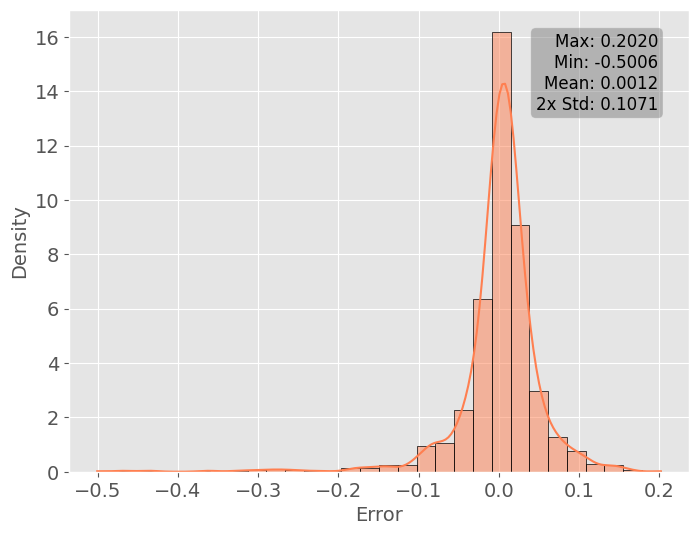

In [28]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
#ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_04_float32.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()

In [ ]:
df = pd.read_csv('./result/output_PQT_evolving.csv', sep=';')

In [18]:
error = df['Predicted'].values - df['Real'].values 

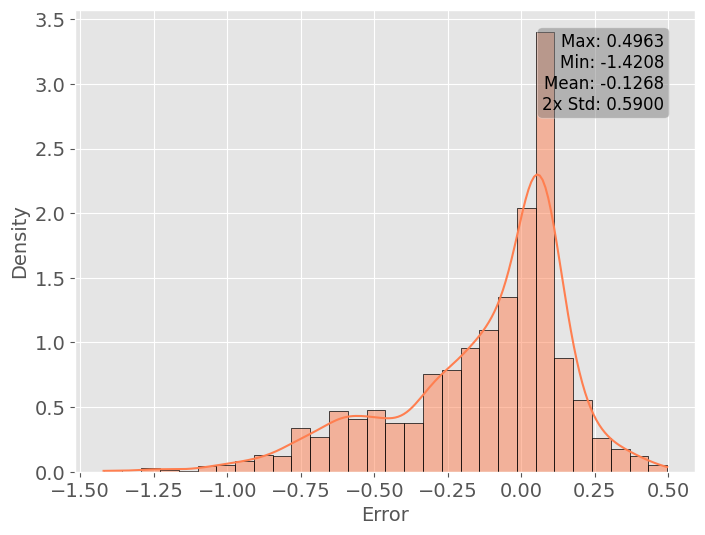

In [19]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
#ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_03_evolving.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()